In [12]:
!pip install pandas numpy scikit-learn matplotlib joblib seaborn





Dataset Shape: (2392, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 K

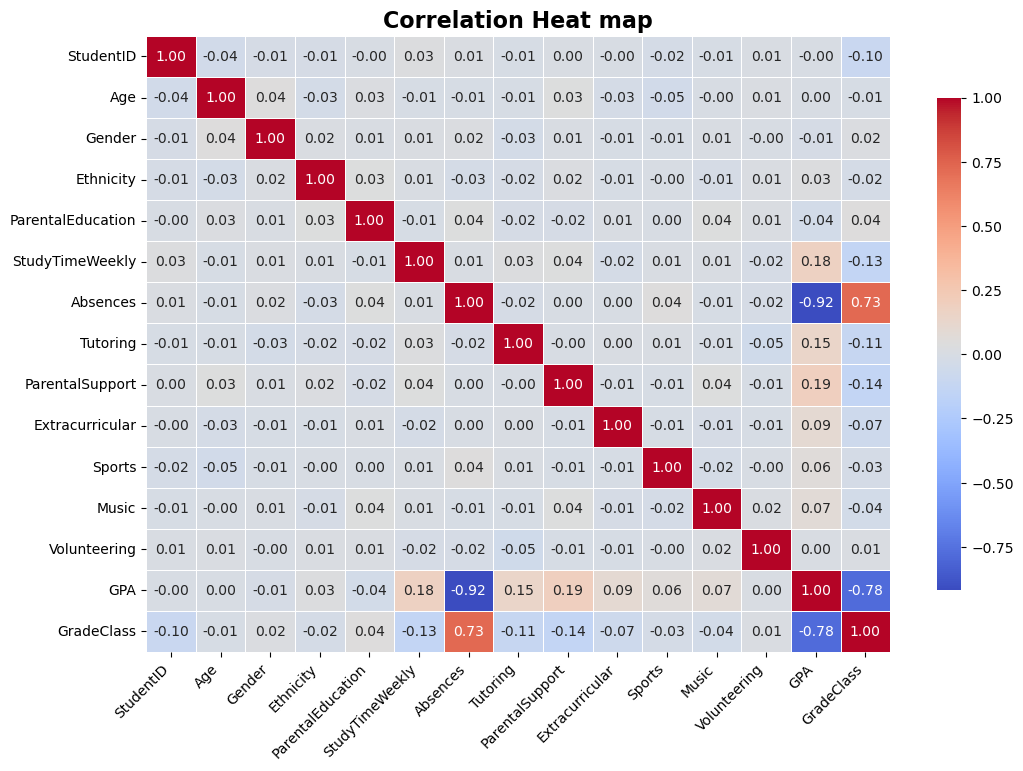

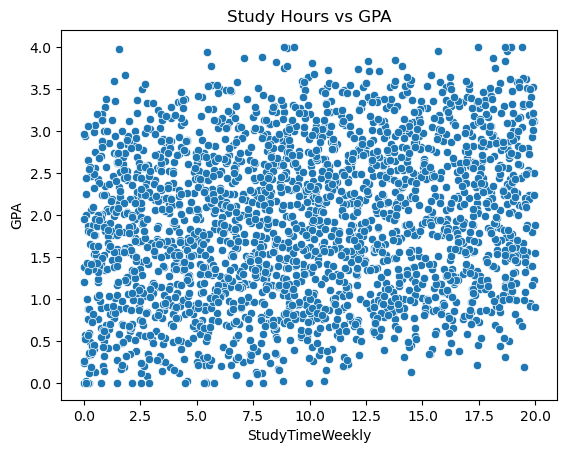

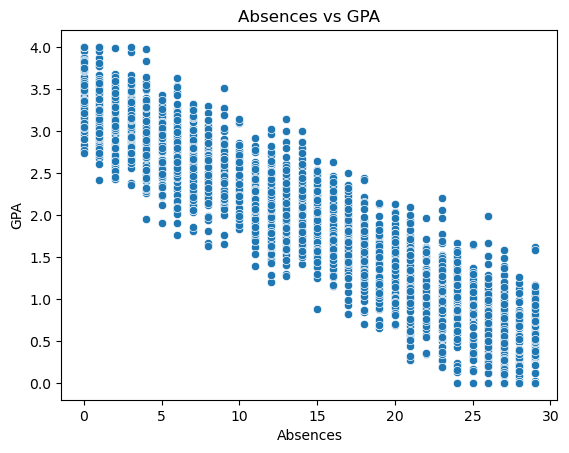

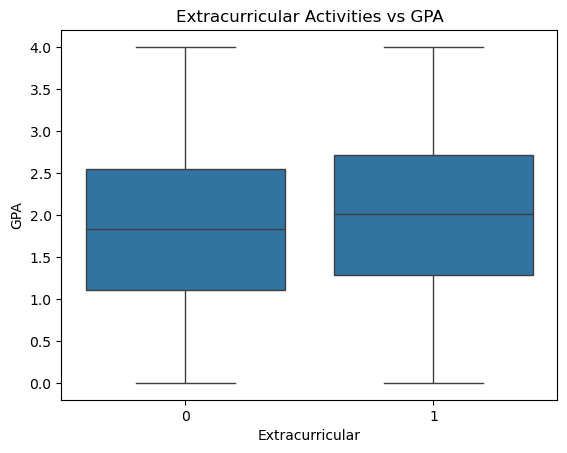


Linear Regression Performance:
MAE: 0.151
RMSE: 0.189
R²: 0.957

Random Forest Performance:
MAE: 0.170
RMSE: 0.227
R²: 0.938


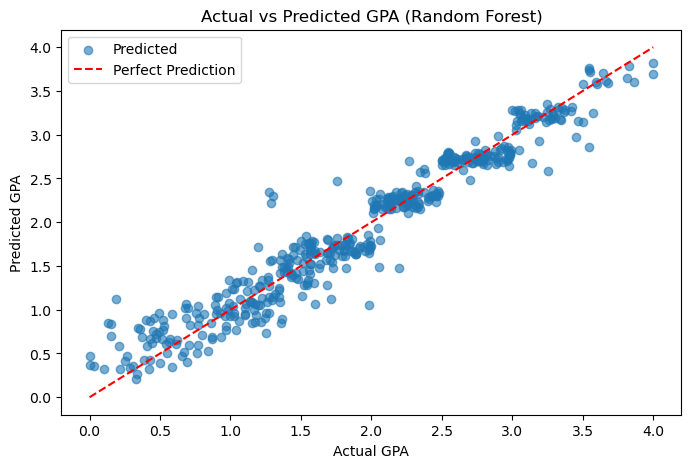

In [1]:
# ===============================
# 1. Import Libraries
# ===============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ===============================
# 2. Load Dataset
# ===============================
df = pd.read_csv("C:/Users/fatim/OneDrive/Documents/student-performance-predictor/data/student_performance.csv")
print("Dataset Shape:", df.shape)
df.head()

# ===============================
# 3. Data Exploration
# ===============================
print(df.info())
print(df.describe())

# Correlation Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f",  cmap="coolwarm", linewidths= 0.5, cbar_kws={"shrink":0.8})
plt.title("Correlatio heatmap" ,fontsize=16, weight="bold")
plt.title( "Correlation Heat map", fontsize=16, weight="bold")
plt.xticks(rotation=45, ha="right")  # axis labels readable banane ke liye
plt.yticks(rotation=0)
plt.show()

# Scatter plots (Study Hours, Attendance, Lifestyle Habits vs GPA)
if "StudyTimeWeekly" in df.columns:
    sns.scatterplot(x="StudyTimeWeekly", y="GPA", data=df)
    plt.title("Study Hours vs GPA")
    plt.show()

if "Absences" in df.columns:
    sns.scatterplot(x="Absences", y="GPA", data=df)
    plt.title("Absences vs GPA")
    plt.show()

if "Extracurricular" in df.columns:
    sns.boxplot(x="Extracurricular", y="GPA", data=df)
    plt.title("Extracurricular Activities vs GPA")
    plt.show()

# ===============================
# 4. Feature Selection
# ===============================
X = df.drop(columns=["GPA"])   # Features
y = df["GPA"]                  # Target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===============================
# 5. Train Models
# ===============================

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# ===============================
# 6. Evaluation
# ===============================
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"MAE: {mae:.3f}")
    print(f"RMSE: {rmse:.3f}")
    print(f"R²: {r2:.3f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")

# ===============================
# 7. Visualization of Predictions
# ===============================
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label="Predicted")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--", label="Perfect Prediction")
plt.xlabel("Actual GPA")
plt.ylabel("Predicted GPA")
plt.title("Actual vs Predicted GPA (Random Forest)")
plt.legend()
plt.show()
